<a href="https://colab.research.google.com/github/JosegSuarezb/aprendizaje-no-supervisado/blob/main/Parcial2_JoseGregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con la base de datos de Sexism Detection in English Texts se deben realizar los siguientes pasos.

1. Seleccione una muestra aleatoria de 1000, deje una semilla con random_state:
       datos_muestra=datos.sample(1000, random_state=su_cedula).
2. Cree una columna con la etiqueta del análisis de sentimiento ¿cuál es el sentimiento más frecuente? y realice un gráfico para visualizar cuál es el sentimiento que se asocia a una mayor proporción de textos sexistas.
3. Cree una columna con las entidades que crea pertinentes en este contexto, comente sobre las entidades más frecuentes.
4. Cree una columna donde realice una limpieza: como pasar a minúsculas, eliminando stop words, eliminar símbolos, entre otros y cree un gráfico para visualizar las palabras más frecuentes.
5. Implemente el algoritmo de LDA y determine el número de tópicos con este algoritmo, justifique.
6. Cree la etiqueta de tópicos y visualice cuál es el tópico qué tiene una mayor proporción de textos sexistas. Dicho tópico visualice las palabras de este tópico, comente ¿qué observa?

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=0a16c896a7dded92df8ad7afad10e5c1e361a2e887fd5cbc8e8b4078ff60866b
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator # libreria para traducir
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from gensim import corpora
from gensim.models import LdaModel,CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#leer base de datos
datos=pd.read_csv('/content/gdrive/MyDrive/aprendizaje no supervisado/dev.csv')
datos.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev


In [ ]:
datos.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2000, 6)

In [ ]:
datos.dropna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.dropna of                      rewire_id  \
0      sexism2022_english-9609   
1       sexism2022_english-966   
2      sexism2022_english-3553   
3     sexism2022_english-13328   
4        sexism2022_english-81   
...                        ...   
1995   sexism2022_english-6672   
1996  sexism2022_english-12605   
1997  sexism2022_english-10008   
1998  sexism2022_english-17035   
1999  sexism2022_english-18781   

                                                   text label_sexist  \
0     In Nigeria, if you rape a woman, the men rape ...   not sexist   
1                        I bet she wished she had a gun   not sexist   
2     I agree with that but at the same time I know ...       sexist   
3     democrats from Minnesota (leftist muzzie shith...       sexist   
4     Texas jury sentences Jordanian immigrant to de...   not sexist   
...                                                 ...          ...   
1995                          The future is female guys   not sexist   
1996  Dude do not ever text a girl something like th...   not sexist   
1997  I cum really hard from anal & clitoral stimula...   not sexist   
1998  Oooh that hurt kind like that Jewish girl who ...   not sexist   
1999  This. Let go of anger. Of cognitive dissonance...   not sexist   

     label_category                        label_vector split  
0              none                                none   dev  
1              none                                none   dev  
2     2. derogation             2.1 descriptive attacks   dev  
3     2. derogation  2.2 aggressive and emotive attacks   dev  
4              none                                none   dev  
...             ...                                 ...   ...  
1995           none                                none   dev  
1996           none                                none   dev  
1997           none                                none   dev  
1998           none                                none   dev  
1999           none                                none   dev  

[2000 rows x 6 columns]>

In [ ]:
datos.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2000, 6)

In [ ]:
datos_muestra=datos.sample(1000, random_state=1005024534)
print(datos_muestra.head())

                     rewire_id  \
671   sexism2022_english-15859   
322    sexism2022_english-6184   
1217   sexism2022_english-3654   
1798  sexism2022_english-15830   
1694   sexism2022_english-7648   

                                                   text label_sexist  \
671   Randy and Elon need their phones taken away. I...   not sexist   
322   Ok, I'll tell her that when we hang out this s...   not sexist   
1217  She killed her son! At 72 can you really blame...       sexist   
1798  Lauren seems to be big enough there are a ton ...   not sexist   
1694  -Good good, now ask her about what she's gonna...   not sexist   

     label_category             label_vector split  
671            none                     none   dev  
322            none                     none   dev  
1217  2. derogation  2.1 descriptive attacks   dev  
1798           none                     none   dev  
1694           none                     none   dev  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Sentimiento Textblob**

In [ ]:
sentimientos =[] # creamos una lista vacia para guardar la información
for elemento in datos_muestra["text"]: # por cada documento de los tweets
  blob = TextBlob(elemento) # aplicacmos el modelo.
  sentimiento= blob.sentiment.polarity # extraemos el sentimiento
  sentimientos.append(sentimiento) # Añadimos el sentimiento
datos_muestra["polarity_textblob"]=  sentimientos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentimientos =[] # Creamos una lista, donde guardamos la etiqueta de sentimiento
for elemento in datos_muestra["text"]: # por cada tweet realizamos:
  blob = TextBlob(elemento) # Aplicamos el algoritmo
  sentimiento= blob.sentiment.polarity # Extraemos el puntaje de sentimiento
  if sentimiento >0: # Si el puntaje es >0 positivo
    etiqueta= "positivo"
  elif sentimiento <0: # Si el puntaje es <0 negativo
    etiqueta= "negativo"
  else: # Caso contrario es neutral.
    etiqueta= "neutral"
  sentimientos.append(etiqueta)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["sentimiento_textblob"]=  sentimientos
datos_muestra["sentimiento_textblob"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
sentimiento_textblob,
positivo,414
negativo,360
neutral,226


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


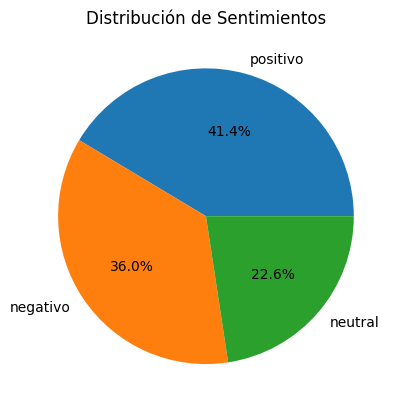

In [ ]:
# Obtener la frecuencia de cada sentimiento
sentimiento_counts = datos_muestra["sentimiento_textblob"].value_counts()

# Crear el gráfico de pastel
plt.pie(sentimiento_counts.values, labels=sentimiento_counts.index, autopct='%1.1f%%')
plt.title("Distribución de Sentimientos")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


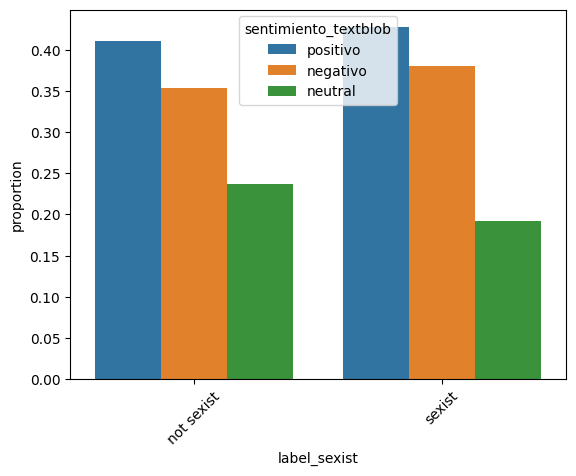

In [ ]:
tabla_frecuencia_relacion= datos_muestra.groupby('label_sexist')['sentimiento_textblob'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='label_sexist', y='proportion', hue='sentimiento_textblob')
plt.xticks(rotation=45)
plt.show()

Como se puede observar de acuerdo con las graficas anteriores el sentimiento que predomina dentro de los textos muestra predomina el sentimiento positivo con un 41,4%, sin embargo, este toma los textos tanto sexistas como no sexitas. Ahora bien relacionando el sentimiento con la variable si es sexita o no, el sentimiento que se asocia a una mayor proporcion de textos sexistas es el positivo con mas de un 40% lo cual se puede relacionar a temas como la defensa del genero entre otras.

**Extraccion de entidades**

Entidades Reconocidas por spacy.load("en_core_web_sm"):
PERSON: Personas, figuras famosas o personajes ficticios.

Ejemplo: "Barack Obama", "Harry Potter".
NORP: Grupos étnicos, religiosos o políticos.

Ejemplo: "American", "Christian", "Communist".
FAC: Edificios, aeropuertos, carreteras, puentes, etc.

Ejemplo: "Eiffel Tower", "Wall Street".
ORG: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.

Ejemplo: "Google", "United Nations", "NASA".
GPE: Países, ciudades o estados.

Ejemplo: "France", "New York", "California".
LOC: Lugares no geopolíticos (montañas, ríos, regiones).

Ejemplo: "Mount Everest", "Sahara Desert".
PRODUCT: Productos o bienes tangibles (objetos físicos).

Ejemplo: "iPhone", "Ford Mustang".
EVENT: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.

Ejemplo: "World War II", "Super Bowl", "Olympics".
WORK_OF_ART: Títulos de obras de arte, libros, canciones, películas, etc.

Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".
LAW: Documentos legales nombrados.

Ejemplo: "Constitution", "The Magna Carta".
LANGUAGE: Idiomas.

Ejemplo: "English", "Spanish", "Mandarin".
DATE: Fechas, períodos de tiempo o cualquier expresión de tiempo.

Ejemplo: "June 25, 2023", "next Monday", "two weeks".
TIME: Tiempos dentro del día.

Ejemplo: "2:30 PM", "midnight", "morning".
PERCENT: Porcentajes.

Ejemplo: "50%", "20 percent".
MONEY: Cantidades monetarias.

Ejemplo: "$100", "500 euros", "10 dollars".
QUANTITY: Cantidades de unidades.

Ejemplo: "10 kilograms", "5 liters", "several meters".
ORDINAL: Números ordinales.

Ejemplo: "first", "second", "third".
CARDINAL: Números cardinales que no caen bajo otra categoría.

Ejemplo: "one", "two", "100".

In [ ]:
import tqdm
entidades=[]
nlp = spacy.load("en_core_web_sm")
for elemento in tqdm.tqdm(datos_muestra["text"]):
  doc = nlp(elemento)
  for ent in doc.ents:
    if ent.label_ == "PERSON" or ent.label_ == "GPE" or ent.label_ == "ORG" or ent.label_ == "NORP":
      entidades.append(ent.text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1000/1000 [00:14<00:00, 67.62it/s]


In [ ]:
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  Por cada noticia vamos a extraer la identidad de GPE, PERSON, ORG y NORP
  Retorna un texto con las entidades separas por ,
  """
  doc = nlp(texto)
  entidades=[] # entidades
  for ent in doc.ents:
    if ent.label_ == "GPE" or ent.label_ == "PERSON" or ent.label_ == "ORG" or ent.label_ == "NORP":
      entidades.append(ent.text)
  entidades=','.join(entidades)
  entidades=entidades.lower()#todo a minusculas
  return entidades

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["entidades"]=datos_muestra["text"].apply(extraer_entidades)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
join_text = ",".join(datos_muestra["entidades"])
pd.Series(join_text.split(",")).value_counts().iloc[0:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
,624
muslim,26
hillary,15
trump,14
muslims,11
jews,10
asian,7
american,7
gabfam,6
christian,6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


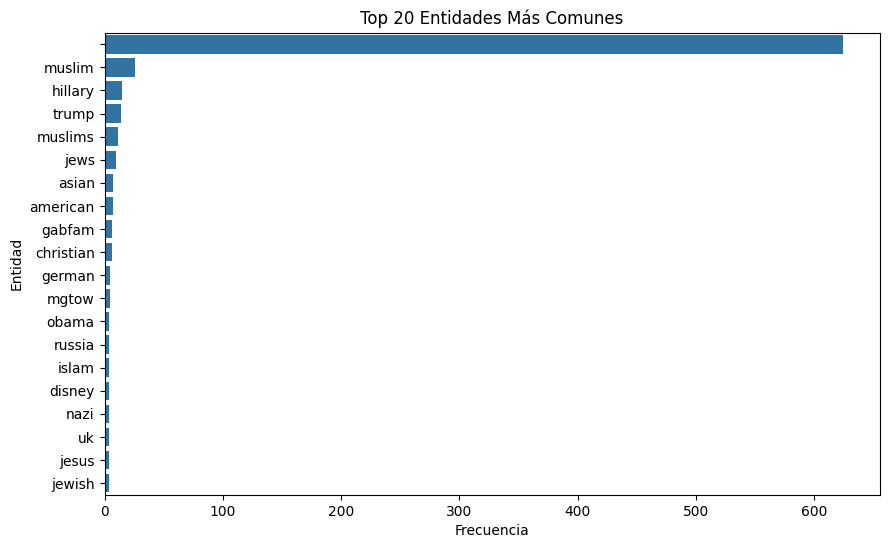

In [ ]:
# Unir todas las entidades en un solo texto
join_text = ",".join(datos_muestra["entidades"])

# Contar la frecuencia de cada entidad
entidad_counts = pd.Series(join_text.split(",")).value_counts()

# Seleccionar las 20 entidades más comunes
top_entidades = entidad_counts.iloc[0:20]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_entidades.values, y=top_entidades.index, orient="h")
plt.title("Top 20 Entidades Más Comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Entidad")
plt.show()

Como se puede observar en el grafico luego de haber sacado las entidades que se pensaron que eran pertinentes se identifico que 624 entidades no se encuentran dentro de las entidades que se contaron pero dentro de las que se saco en la entidad NORP que son grupos etnicos la entidad mas repetida es el muslim, en PERSON las entidades mas repetidas son Hillary y Trump, ORG se identifico Disney y en GPE Russia.

**Limpieza de texto**

In [ ]:
def texto_limpio(texto):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  """
  texto_limpio=texto.lower()
  texto_limpio=re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio= re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio)  # eliminar la URL
  texto_limpio = texto_limpio.split() # separacion de tokens
  stop_words_nltk_en =list(set(stopwords.words('english')))
  stop_words_nltk_en =["https", "http", "www","bit", "url", "get", "would", "even", "user", "one", "time", "ok", *stop_words_nltk_en] # palabras a eliminar
  texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # eliminacción de stop word
  texto_limpio=' '.join(texto_limpio) # juntar los tokens
  return texto_limpio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["texto_limpio"]=datos_muestra["text"].apply(texto_limpio)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["texto_limpio"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,texto_limpio
671,randy elon need phones taken away surprised ja...
322,tell hang saturday
1217,killed son really blame wanting someone else t...
1798,lauren seems big enough ton pick type posts ha...
1694,good good ask gonna major college go script go...
...,...
1562,friend went dr several times wife never proble...
1298,yeah fact checkers remark going burn later alr...
1155,offer women
1229,women try bs months ago result


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Size of new BoW title = 4338


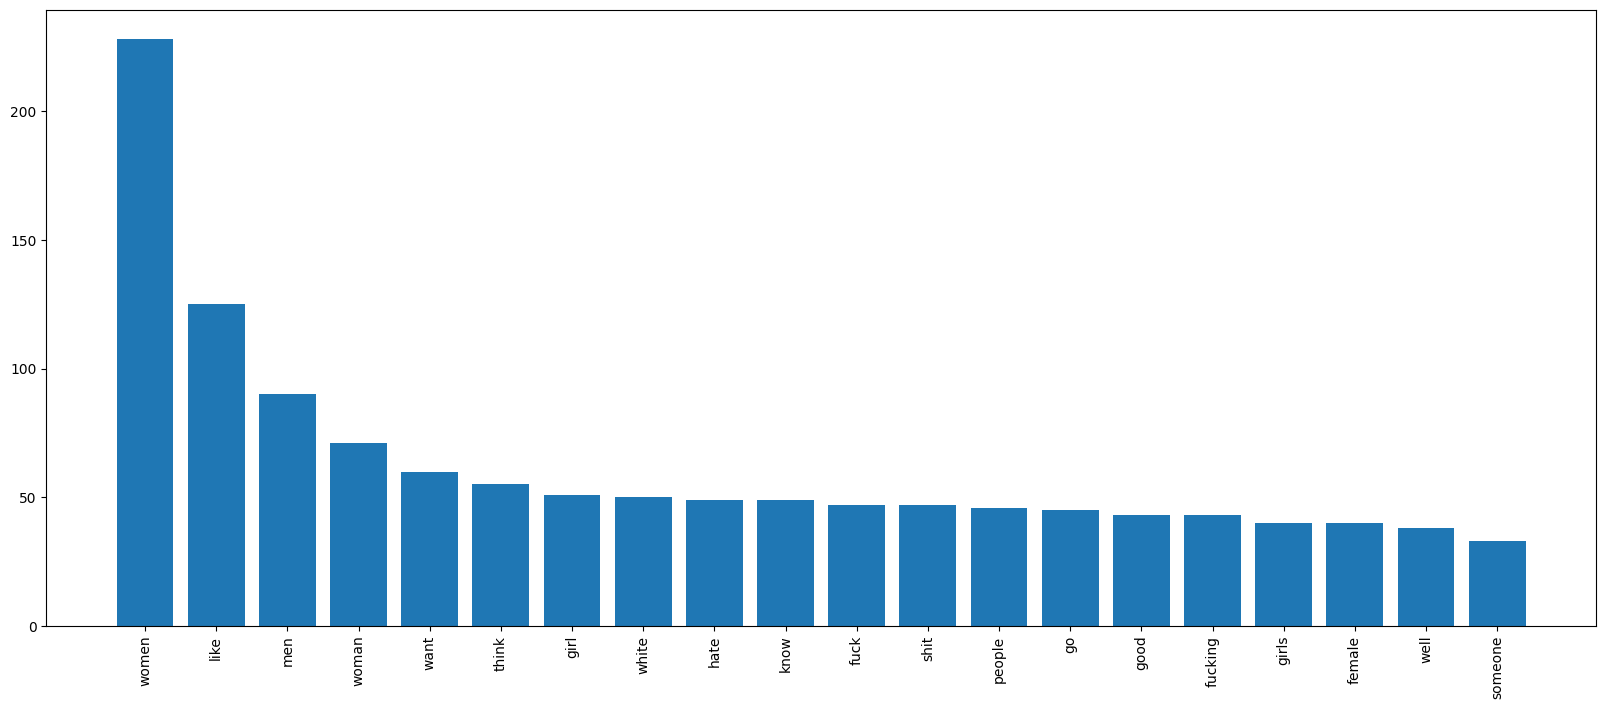

In [ ]:
texto_frecuencia =  " ".join(datos_muestra["texto_limpio"])
tokens_=nltk.FreqDist(   texto_frecuencia.split() )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Luego de haber realizado la limpieza del texto y de graficar las palabras que mas se repiten se puede observar que muchos de los comentarios que se encuentran en la muestra se relaciona a mujeres lo que puede ser que esten criticando a las mujeres o las defiendan en algun tema pero hay una gran probabilidad de que algun comentario este relacionado a mujeres.

**LDA**

In [ ]:
count_vectorizer = CountVectorizer(min_df=(10))
X_count = count_vectorizer.fit_transform(datos_muestra["texto_limpio"])
datos_muestra["tokens"]=datos_muestra["texto_limpio"].apply(lambda x: x.split())
datos_muestra["tokens"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
671,"[randy, elon, need, phones, taken, away, surpr..."
322,"[tell, hang, saturday]"
1217,"[killed, son, really, blame, wanting, someone,..."
1798,"[lauren, seems, big, enough, ton, pick, type, ..."
1694,"[good, good, ask, gonna, major, college, go, s..."
...,...
1562,"[friend, went, dr, several, times, wife, never..."
1298,"[yeah, fact, checkers, remark, going, burn, la..."
1155,"[offer, women]"
1229,"[women, try, bs, months, ago, result]"


In [ ]:
# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [dictionary.doc2bow(text.split()) for text in datos_muestra["texto_limpio"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values = [] # parametro determinar tópicos
model_list = {} # modelos de tópicos
topicos_num= range(2,10)
for num_topics in topicos_num:
    model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)
    model_list[num_topics] = model
    coherencemodel = CoherenceModel(model=model, texts=datos_muestra["tokens"], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


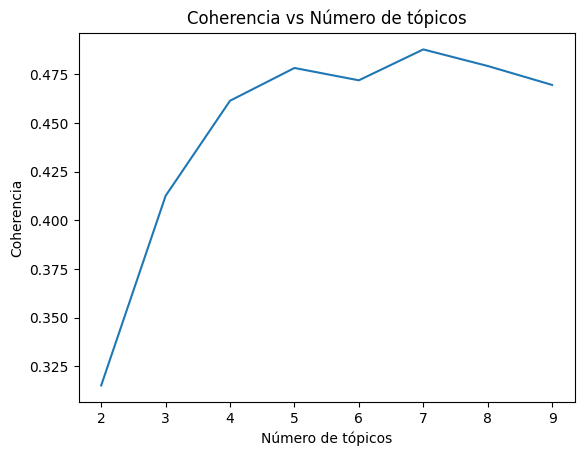

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia")
plt.title("Coherencia vs Número de tópicos")
plt.show()

In [ ]:
# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[4], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = model_list[4].print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.108*"women" + 0.055*"like" + 0.041*"men" + 0.029*"woman" + 0.026*"want" + 0.024*"girl" + 0.024*"think" + 0.023*"white" + 0.021*"hate" + 0.019*"know"')
(1, '0.068*"girls" + 0.061*"good" + 0.052*"wife" + 0.042*"yeah" + 0.038*"back" + 0.034*"right" + 0.034*"also" + 0.031*"might" + 0.031*"bitch" + 0.030*"actually"')
(2, '0.086*"go" + 0.069*"way" + 0.059*"say" + 0.057*"much" + 0.057*"got" + 0.041*"really" + 0.036*"every" + 0.035*"keep" + 0.034*"let" + 0.029*"gets"')
(3, '0.081*"fuck" + 0.076*"fucking" + 0.071*"well" + 0.060*"see" + 0.057*"going" + 0.045*"muslim" + 0.041*"sure" + 0.038*"mother" + 0.037*"bad" + 0.036*"rape"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
document_topics = model_list[4].get_document_topics(corpus)
dominant_topics = []
for doc_topics in document_topics:
    # Ordenar los tópicos por probabilidad y tomar el de mayor valor
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # x[1] es la probabilidad, x[0] es el ID del tópico
    dominant_topics.append(dominant_topic)
datos_muestra["dominant_topic"] = dominant_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["dominant_topic"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
dominant_topic,
0,974
1,10
2,9
3,7


Como se puede observar anteriormente se concluyo que el numero correcto de topicos es 4 ya que teniendo en cuenta la grafica de coherencia se muestra que el mayor ascenso se obtuvo hasta el 4 a pesar de que este no fue el pico pero despues del 4 no hubo una diferencia sustancial por lo que se concluyo que ese fue el numero correcto y ademas se evidencio en el grafico de burbujas donde se observo una correcta distribucion y como se evidencia en la frecuencia el cual la burbuja 1 que es el topico 0 fue el que mas agrupo palabras.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


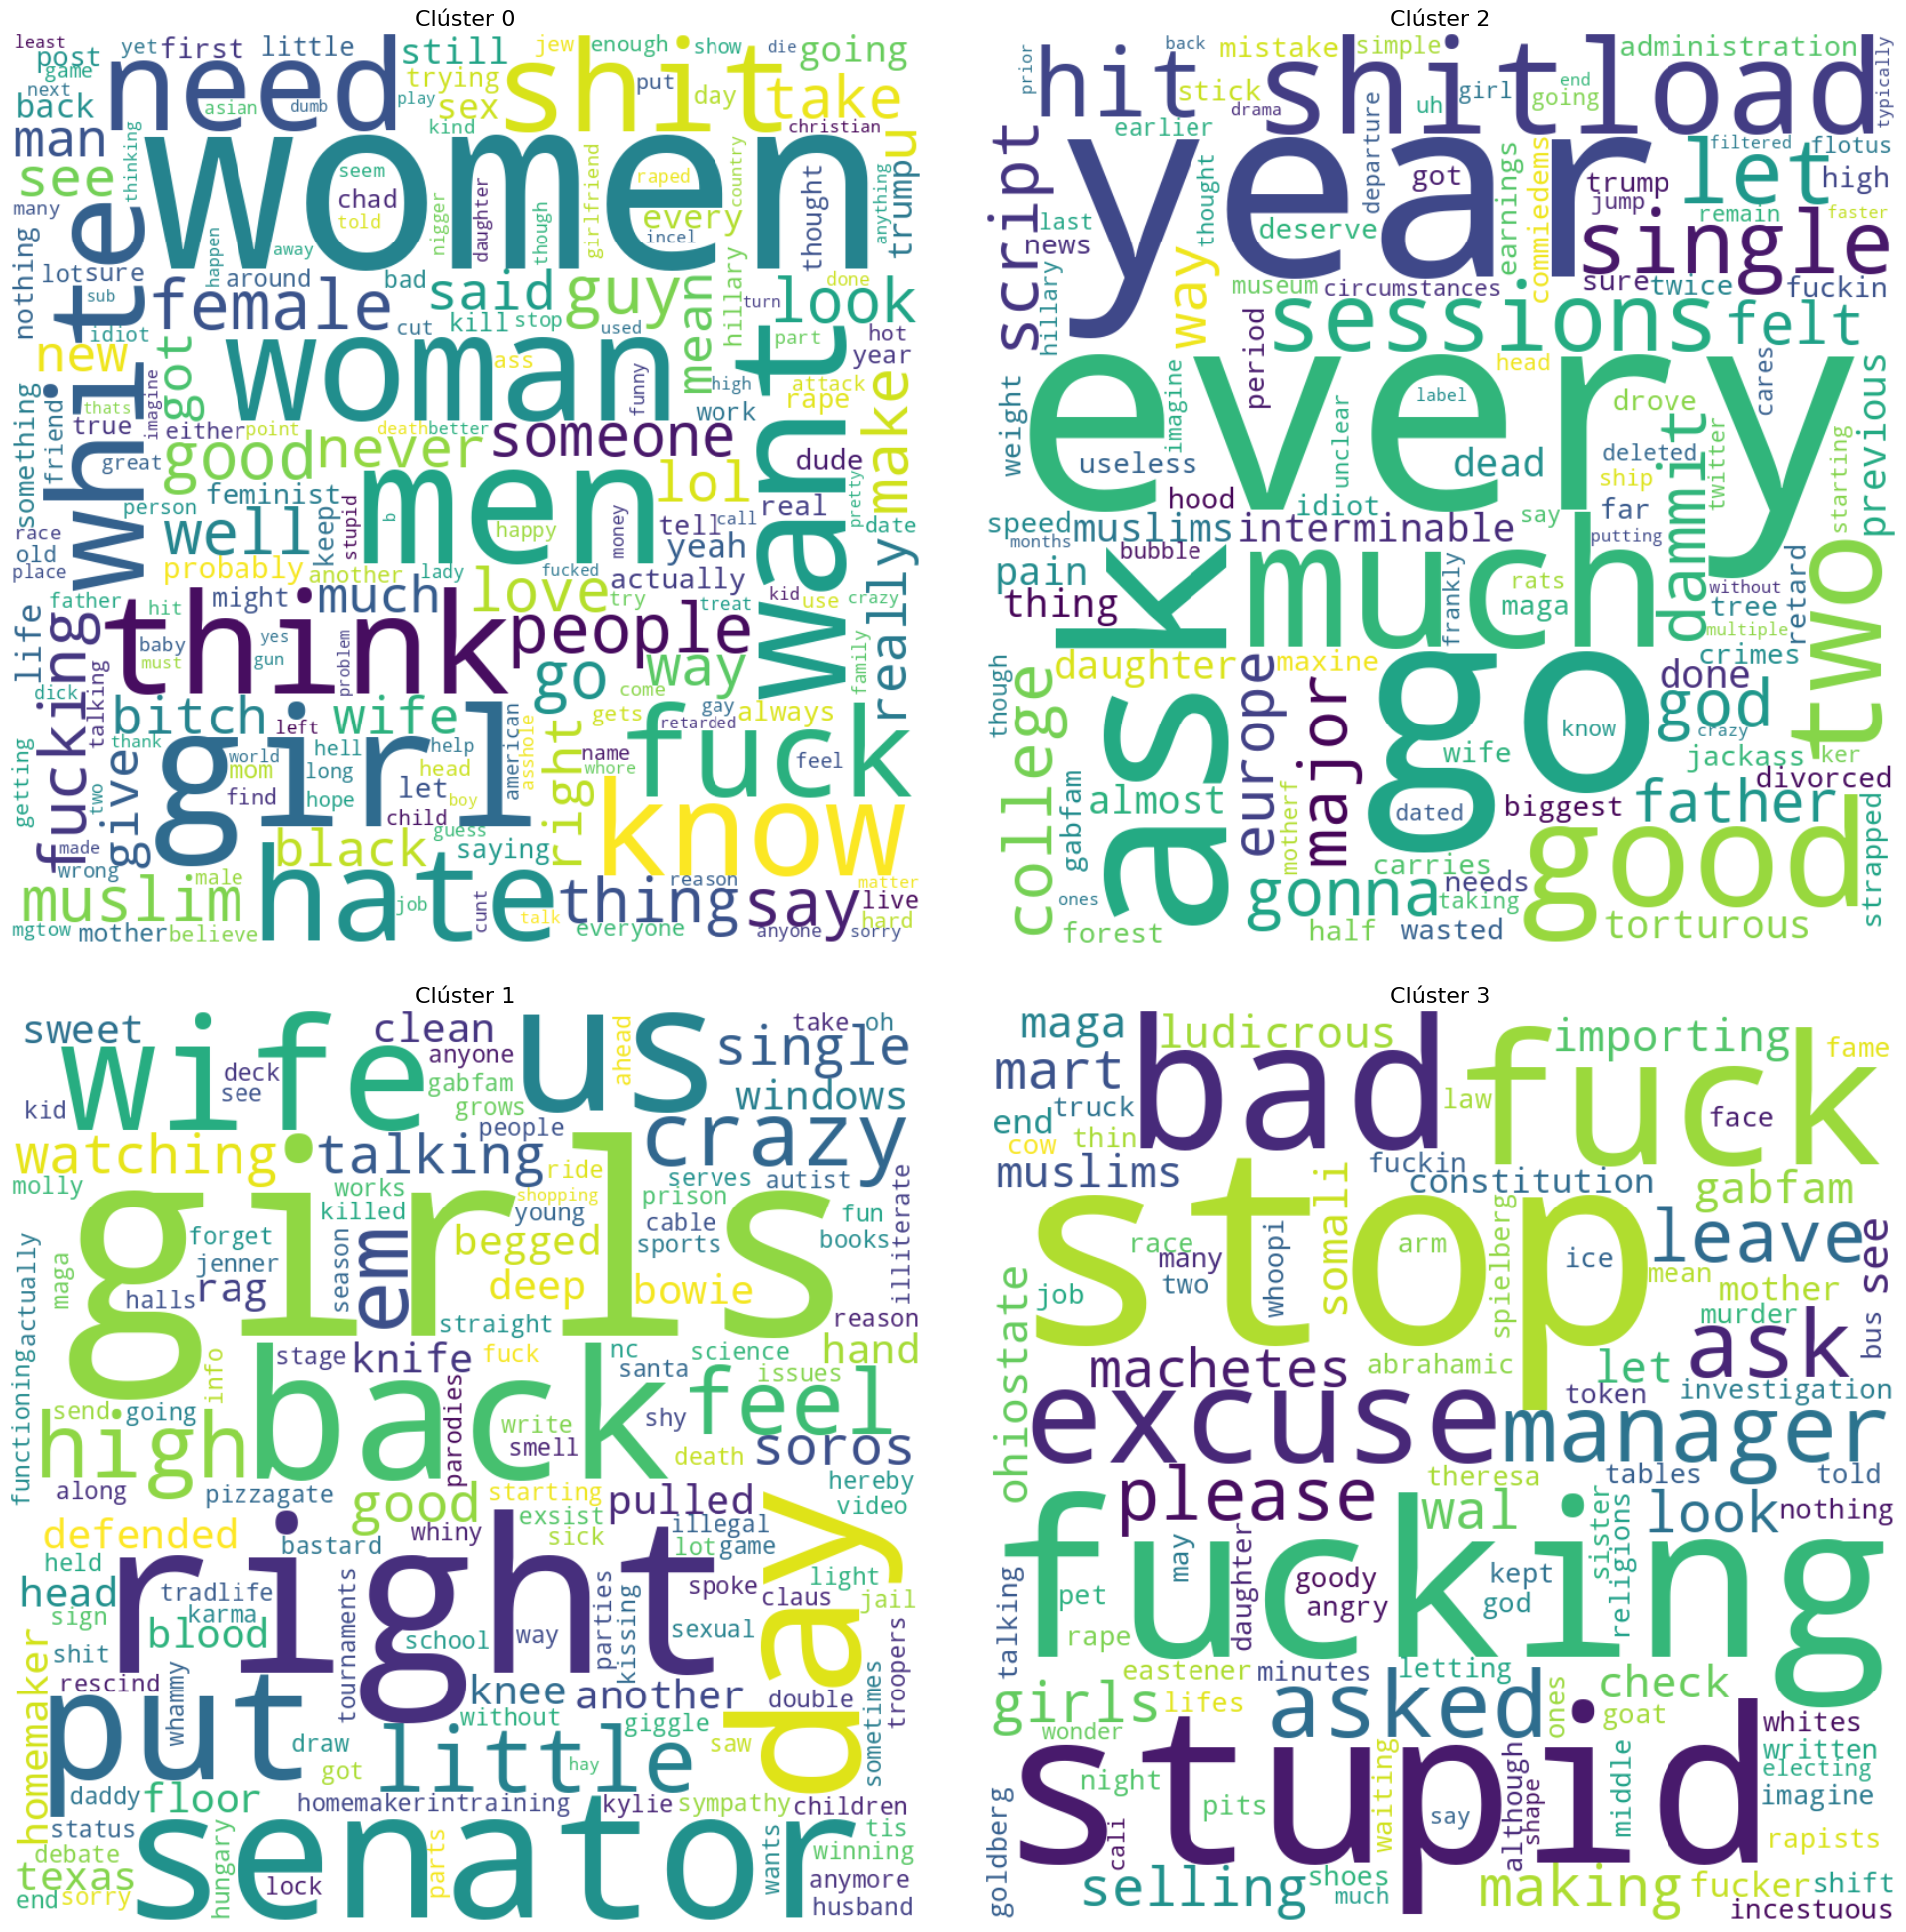

In [ ]:
import math
# Obtener los valores únicos de labels_kmeans
labels_unicos = datos_muestra["dominant_topic"].unique()

# Definir el número de filas y columnas
num_columnas = 2
num_filas =  math.ceil(len(labels_unicos) / num_columnas)  # Calcular el número de columnas necesarias


# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))  # Ajustar el tamaño total del gráfico
axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

# Generar una nube de palabras por cada valor único en labels_kmeans
for i, label in enumerate(labels_unicos):
    # Unir los textos que corresponden al label actual
    filtro_cluster=datos_muestra["dominant_topic"] == label
    texto_join = " ".join(datos_muestra.loc[filtro_cluster, "texto_limpio"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(texto_join)

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Clúster {label}", fontsize=16)

# Eliminar cualquier subplot vacío (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout(pad=3)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


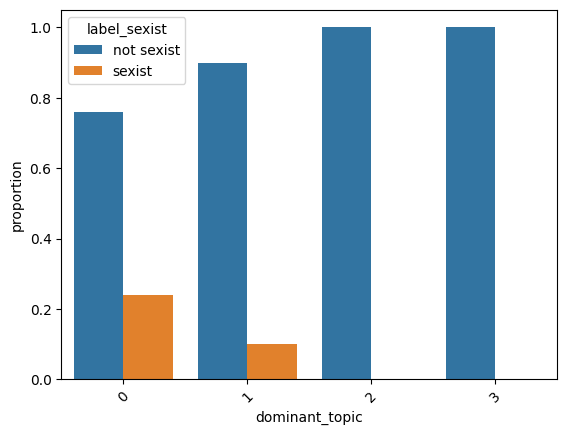

In [ ]:
tabla_frecuencia_relacion = datos_muestra.groupby('dominant_topic')['label_sexist'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='dominant_topic', y='proportion', hue='label_sexist')
plt.xticks(rotation=45)
plt.show()

De acuerdo con esta grafica de frecuencia se puede observar que el topico 0 es el que mayor posee comentarios sexistas en el cual se mencionan palabras como: Shit, Hate, Fuck, entre otras, lo que se tratarian temas como de odio a un genero o comentarios negativos sore algun tema.